In [35]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#loading the data
data = pd.read_csv("HomeBuyer.csv")

In [37]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [38]:
x = data.iloc[:,[0,1]].values
y = data.iloc[:,2].values

In [39]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [40]:
#features scaling
from sklearn.preprocessing import StandardScaler
i_scalar = StandardScaler()
x_train = i_scalar.fit_transform(x_train)
x_test = i_scalar.transform(x_test)

Feature scaling is done in order to normalise the data within a particular range. It helps in speeding up the calculations.

In [41]:
##Fitting the Logistic regression to the train data. Logistic regression is a 
##linear classifier after which the data is divided by a straight line.
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression(random_state=0)
LRClassifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Predicting the values
Prediction = LRClassifier.predict(x_test)


Prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1])

In [43]:
#Evaluating the performance
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ConfusionMatrix = metrics.confusion_matrix(y_test,Prediction)

In [44]:
score = LRClassifier.score(x_test, y_test)
print("Accuracy:",score)

Accuracy: 0.8731343283582089


In [45]:
ConfusionMatrix

array([[79,  6],
       [11, 38]])

[[9.99069280e-08 1.00884013e-07 1.01870655e-07 ... 1.63287202e-03
  1.64881511e-03 1.66491360e-03]
 [1.01966149e-07 1.02963374e-07 1.03970351e-07 ... 1.66647170e-03
  1.68274230e-03 1.69917149e-03]
 [1.04067814e-07 1.05085592e-07 1.06113325e-07 ... 1.70076159e-03
  1.71736640e-03 1.73413305e-03]
 ...
 [9.85537432e-01 9.85675499e-01 9.85812266e-01 ... 9.99999104e-01
  9.99999112e-01 9.99999121e-01]
 [9.85825365e-01 9.85960723e-01 9.86094806e-01 ... 9.99999122e-01
  9.99999130e-01 9.99999139e-01]
 [9.86107647e-01 9.86240347e-01 9.86371796e-01 ... 9.99999139e-01
  9.99999148e-01 9.99999156e-01]]


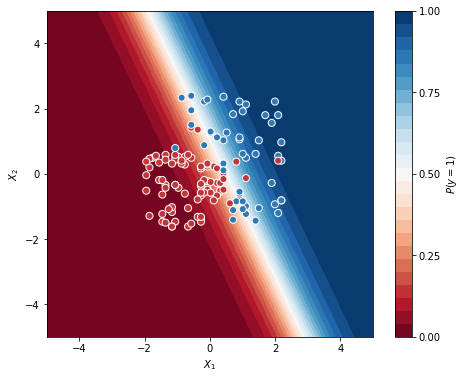

In [46]:
#Visualisation

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRClassifier.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_test[:, 0], x_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

**ROC Curve**:

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.

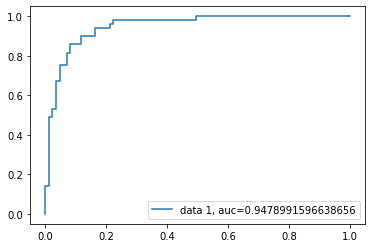

In [47]:
y_pred_proba = LRClassifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


AUC score for the case is 0.94. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.